<a href="https://colab.research.google.com/github/m7saikat/IE-7374/blob/master/Lab_2(c)_MABs_Nonstationary_WeightedAverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2-c: Multi-armed Bandits Problem (Nonstationary with Weighted Average)

## 1- Introduction
Since we often encounter reinforcement learning problems that are effectively nonstationary. In such cases it makes sense to give more weight to recent rewards than to long-past rewards. 

One of the most popular ways of doing this is to use a constant step-size parameter, $\alpha$. For example, the incremental update rule (2.3) for updating an average Qn of the n1 past rewards is modiﬁed to be

$Q_{n+1} = Q_n + \alpha [R_n - Q_n ]$ ... $(2.3)$

where the step-size parameter $\alpha \in (0,1]$ is constant. This results in $Q_{n+1}$ being a weighted average of past rewards and the initial estimate Q1.

The equation $(2.3)$ can also be refactored as follows,

$Q_{n+1} = (1-\alpha)^{n}Q_1 + \sum_{i=1}^{n} \alpha(1-\alpha)^{n-i}R_i$ ... (2.6)

We call this a `weighted average` because the sum of the weights in equation $(2.6)$ is $1$. Also, note that the weights given to the rewards depends on how many rewards ago it was observed $n-i$. Since the weight decays exponentially according to the exponent on $1-\alpha$,  this is sometimes called an `exponential recency-weighted average`.


### Importing Libraries
---

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 2- Problem Definition

### Expected initial action value
---
Given a standard deviation $\mu$, $scale$ and number of values required, i.e. $arms$ this function returns the initial expected action values corresponding to each arm for each bandit problem.


In [0]:
# This function generates the true value of actions
def expected_action_value_function(mu=0, scale=1, arms=10):
    expected_action_value = np.random.uniform(1,-1 , arms)
    return expected_action_value

### Adding randomness to the expected action values


---
Given a standard deviation $\mu$, $scale$ and number of values required, i.e. $arms$ this function adds a randomness to the existing action values by adding 
a normally distributed increment with mean $0$ and standard deviation $0.01$ to it.


In [0]:
def update_expected_action_value(expected_action_value):
    expected_action_value += np.random.normal(0, 0.01, arms) 
    return(expected_action_value)

### Reward function</span> 

---

This function returns true rewards corresponding to each action taken for a particular step. 

As we know the true rewards , i.e the rewards corresponding to the 10 action values, $q∗(a), a = 1,...,10,$ are selected according to a normal (Gaussian) distribution with mean $0$ and variance $1$.

In [0]:
def reward_function(action_taken, expected_action_value,scale=1):
    reward = expected_action_value [action_taken] + np.random.normal(scale) # reward=N(Mu,1) or Mu+N(0,1)
    return reward

## 3- Implmentation

### Methods 1:  <span style="color:blue">$\epsilon-greedy$</span>  function 

---

In [0]:
# Define the e-greedy funtion
def e_greedy(estimate_action_value,e,arms): 
    # genereate a random num (0,1) to be compared with epsilon
    e_estimator = np.random.uniform(0, 1) 
    # epsilon-greedy appraoch
    action = np.argmax(estimate_action_value) if e_estimator > e else np.random.choice(np.arange(arms))
    return action

### Action Value estimation-  <span style="color:red"> Method 2: Weighted Average approach</span> 

---




In [0]:
# Define estimate_action_value function (using sample average method)
def weighted_average (estimate_action_value, action, reward, alpha):
  estimate_action_value[action] = estimate_action_value[action] + alpha * (reward - estimate_action_value[action])
  return estimate_action_value

### The k-armed bandit problem

---

In [0]:
def multi_arm_bandit_problem(alpha=0.1, arms = 10, steps = 1000, e = 0.1, expected_action_value = [], scale=1 ):
    # Initilization 
    overall_reward, optimal_action = [], [] 

    # Initial Action values is set to zero 
    estimate_action_value = np.zeros(arms)

    #number of times is action (arm) is taken 
    count = np.zeros(arms) 

    # Main loop
    for s in range(0, steps):

        # Select an action
        action=e_greedy(estimate_action_value,e, arms)

        # Adding randomness to the action value for each bandit problem,
        # thus simulating variable rewards over time. This segment makes a stationary
        # reward system, non-stationary.
        expected_action_value = update_expected_action_value(expected_action_value) 

        # Observe the reward for the selected Action
        reward = reward_function(action, expected_action_value,scale)

        # Update Estimates of Action Value for the selected Action based on its observed Reward
        estimate_action_value=weighted_average(estimate_action_value, action, reward, alpha)
        
        # Update rewards' list
        overall_reward.append(reward)

        # If the optimal action is taken
        optimal_action.append(action == np.argmax(expected_action_value))

        # Increment the number of times the selected action is takern
        count[action] += 1
        
    return overall_reward, optimal_action

### Multi-arm testbed

---


In [0]:
# The k-armed bandits testbed
def run_game(epsilon, alpha=0.1, runs = 5000, steps = 1000, mu=0, scale=1, arms = 10):
    rewards = np.zeros((runs, steps))
    optimal_actions = np.zeros((runs, steps))
    expected_action_value = expected_action_value_function(mu=mu, scale=scale , arms=arms)
    # Replicate each expreiment                                 
    for run in range(0, runs):
        rewards[run][:], optimal_actions[run][:] = multi_arm_bandit_problem(alpha= alpha,
                                                                            arms = arms, 
                                                                            steps = steps,
                                                                            e = epsilon,
                                                                            expected_action_value = expected_action_value, 
                                                                            scale=scale)
    rewards_avg = np.average(rewards, axis = 0)
    optimal_action_perc = np.average(optimal_actions, axis = 0)
    return(rewards_avg, optimal_action_perc)

### Plotting the reward performance and optimal action percentage of the agents with different epsilon values.


---

In [0]:
# Number of arms of bandits.
arms=10

# Numner of episodes in each run
steps = 5000

# Total number of runs
runs = 2000  

# The list of corresponding epsilon values for both the plots
Epsilons=[0.0, 0.01, 0.1]

# Step Size
alpha = 0.1

In [0]:
# Running the Experiment with different Epsilon Values
rewards_avg_by_epsilon = dict()
optimal_action_perc_by_epsilon = dict()
for epsilon in Epsilons:
    print('Running for epsilon {}'.format(epsilon))
    rewards_avg, optimal_action_perc = run_game(epsilon, alpha, runs=runs, steps=steps, arms=arms)
    rewards_avg_by_epsilon[epsilon] = rewards_avg
    optimal_action_perc_by_epsilon[epsilon] = optimal_action_perc

print('Experiment is complete')    

Running for epsilon 0.0
Running for epsilon 0.01
Running for epsilon 0.1
Experiment is complete


Text(0,0.5,'Average Reward')

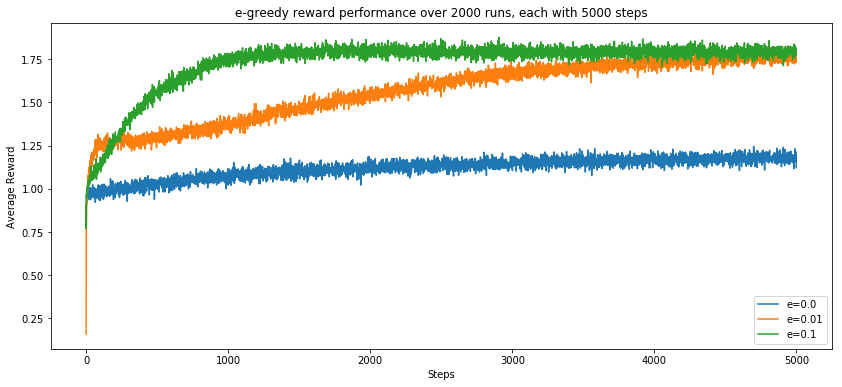

In [0]:
f, ax = plt.subplots(nrows=1, ncols=1,figsize=(14, 6))
for epsilon in Epsilons:
    ax.plot(range(steps), rewards_avg_by_epsilon[epsilon], label='e={}'.format(epsilon))
ax.legend(loc='lower right')
plt.title('e-greedy reward performance over {}'.format(runs) +' runs, each with {}'.format(steps) + ' steps')
plt.xlabel('Steps')
plt.ylabel('Average Reward')

(0, 1)

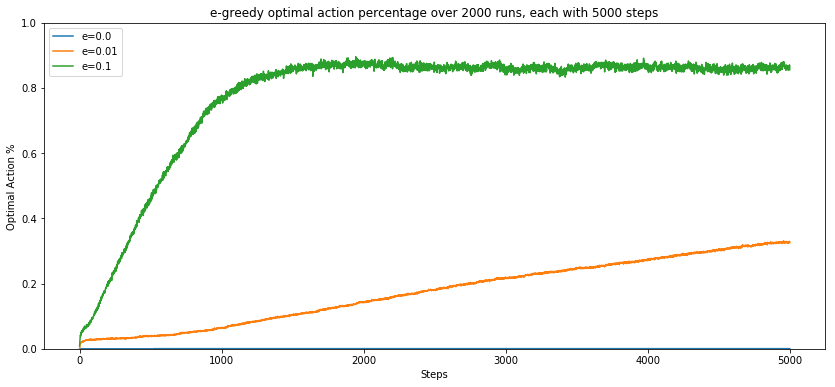

In [0]:
f, ax = plt.subplots(figsize=(14, 6))
for epsilon in Epsilons:
    ax.plot(range(steps), optimal_action_perc_by_epsilon[epsilon], label='e={}'.format(epsilon))
ax.legend()
plt.title('e-greedy optimal action percentage over {}'.format(runs) +' runs, each with {}'.format(steps) + ' steps')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
ax.set_ylim(0,1) #Max for 100%